# Solution: Modelling an infected cohort

In [1]:
# Loading the packages
library(deSolve)   # package with functions to solve the model
library(reshape2)  # package with functions to turn the model 
                   # output into a long format
library(ggplot2)   # package for plotting

Filling in the input and specifying timesteps:

In [2]:
initial_number_infected <- 1000000  # a cohort, 1000000 currently infected
                                    # people
initial_number_recovered <- 0       # no one has recovered
                                    # at the beginning of the simulation
recovery_rate <- 1/10               # the average duration spent in the I
                                    # compartment is 10 days,
                                    # so rate of recovery = 1/10 days^-1 
                                    # or 0.1 per day
follow_up_duration <- 4*7           # we want to know how many recover 
                                    # over a 4 week period, 
                                    # which equals 4*7 = 28 days

# Combine into the model input vectors:
initial_state_values <- c(I = initial_number_infected, 
                          R = initial_number_recovered)  

parameters <- c(gamma = recovery_rate)  

times <- seq(from = 0, to = follow_up_duration, by = 1) 

# I and R in the initial_state_values vector store how many people
# there are in each compartment at the 
# first timestep t0 (the beginning of the simulation). 

# The parameters vector stores the value of each transition rate
# (arrows) between compartments (boxes). 
# In this case we only have one transition: from I to R.

# The times vector stores a sequence of timepoints starting at 0.
# We want to run the model for 28 days, so 28 is the
# last value in the times vector. by = 1 tells the deSolve package that
# we want to calculate the model output at 
# timesteps of 1 day.

# It is important to be consistent with the time units (days vs. weeks):
# the recovery rate you have defined is applied at every timestep
# between 0 and the end of follow-up specified in the times vector. 
# Since our recovery rate is in units of days^-1,
# if you had put 4 as the follow-up duration, you would simply be 
# calculating the number of infected and recovered people over a 4 days.

Specifying the model function

In [3]:
cohort_model <- function(time, state, parameters) {    # specify the model 
                                                       # as a function with
                                                       # input arguments
    
    with(as.list(c(state, parameters)), {  
      
    # Differential equations
      dI <- -gamma * I
      dR <- gamma * I
        
    return(list(c(dI, dR)))                             # return output
    })
  
}

# Further explanations:

# To solve our model, called "cohort_model", using the deSolve package, 
# we need to define it as a function.
# When using deSolve, every model function takes as input arguments
# (in the following order): 
# 1) time: the timesteps that we want to solve the model at
# 2) state: storing the number of people in each compartment at 
# each timestep
# 3) parameters: names and values of model parameters,
# for example the rates of transition between compartments

# with(as.list(c(state, parameters)), {...} tells R to look
# within the objects containing our state variables and 
# parameters (by combining and converting them to a list object),
# so that you can refer to them directly. 
# In other words, we can unpack the state variables specified in "state" 
# and the model parameters specified in "parameters" using
# the with() command, for our convenience.
# For example, instead of having to write parameters["gamma"]
# you can simply write gamma as long as you are within the {}
# brackets of the with statement.

# The next two lines are the differential equations that calculate the 
# rate of change of the state variables. 
# Note that for coding purposes it does not matter which name you
# chose for the rate of change, but the most common notation is to
# write dI and dR for compartments I and R as shown here. 

# At the end of an R function we need to specify what we want the output
# to be. Here, these outputs should be the rate of change of I and R:
# that is, simply dI and dR. To specify these as outputs we use return().
# To get the output in a convenient format, we are saving the
# solutions to the differential equations as a vector within a list.

# IMPORTANT: we have to return the rate of change variables in the 
# same order as the input state variables.
# Since in our state vector initial_state_values, we specify I as the first
# variable and R as the second, similarly we also have to specify dI
# as the first output and dR as the second.
# If you have changed the name of your state variables or the rates of 
# change variables, make sure to use the correct names here as well.

Solving the model equations using the ```ode()``` function in the deSolve package and saving them as a dataframe object:

In [4]:
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = cohort_model,
                            parms = parameters))

# We are using the default integration function of the deSolve package,
# ode (which stands for ordinary differential equations)
# While the package contains other methods to do the integration,
# you don't have to worry about that in this course.

# Printing the model output
output

# This returns a dataframe with columns:
# "time" (containing our times vector), 
# "I" (containing the number of infected people at each timestep) and 
# "R" (containing the number of recovered people at each timestep).

time,I,R
0,1000000.00,0.00
1,904837.42,95162.58
2,818730.75,181269.25
3,740818.22,259181.78
4,670320.04,329679.96
5,606530.66,393469.34
6,548811.63,451188.37
7,496585.30,503414.70
8,449328.96,550671.04
9,406569.66,593430.34


### Based on the output, how many people have recovered after 4 weeks? 

In [5]:
output[output$time == 28, c("time","R")]   
# printing the "time" and "R" output columns when the timestep equals 28
# Answer: 939189.9 people are in the recovered compartment at timestep 28

,time,R
29,28,939189.9


### What proportion of the total population does this correspond to?

In [6]:
output[output$time == 28,"R"]/(output[output$time == 28,"I"]+output[output$time == 28,"R"]) # note this is only on a separate line 
                                # for formatting reasons!

# Answer: 93.9%

# All we are doing here is dividing the number of recovered people at the
# 4 week timestep by the total population size (I + R) at this timestep.
# Note that since there are no births and deaths in our model, 
# the total population size is the same at each timestep, so we could 
# also calculate it by taking sum(initial_state_values).

[1] 0.9391899

In [11]:
output_long <- melt(as.data.frame(output), id = "time")  
output_long["value"]

value
1000000.00
904837.42
818730.75
740818.22
670320.04
606530.66
548811.63
496585.30
449328.96
406569.66


### Plotting the output

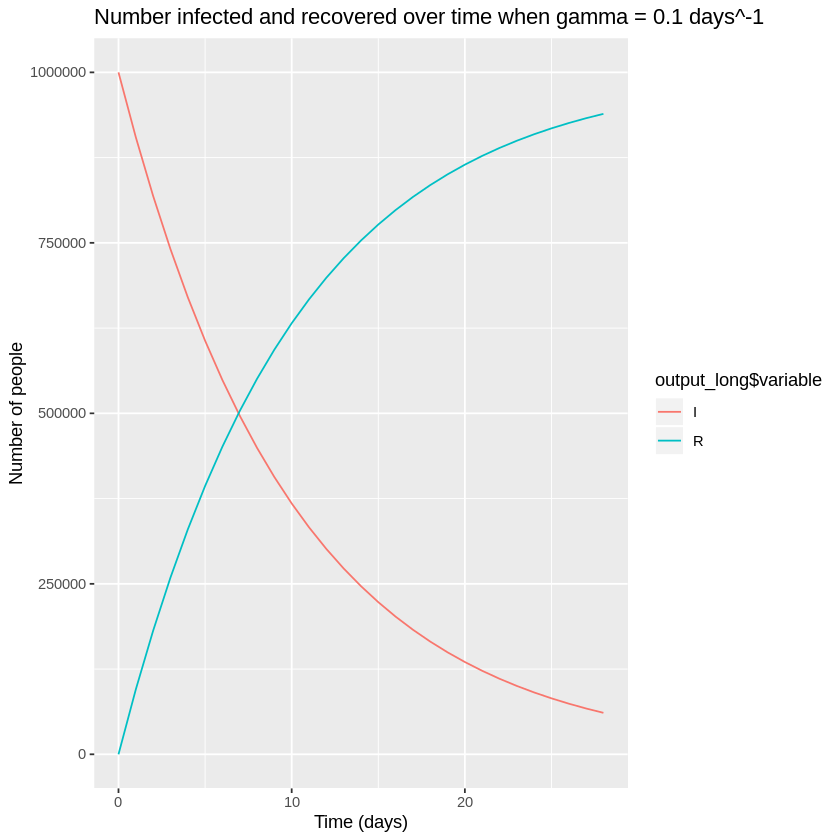

In [19]:
# First turn the output dataset into a long format, so that the
# number in each compartment at each timestep are all in the same column
output_long <- melt(as.data.frame(output), id = "time")                  

# Plot the number of people in each compartment over time
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = output_long$time, y = output_long$value , colour = output_long$variable, group = output_long$variable)) +  
       # in the long-format output dataset, the number in each compartment
       # is in the "value" column and the compartment the number relates 
       # to is in the "variable" column. We are telling ggplot to assign a 
       # different colour to each compartment/group, which automatically 
       # generates a legend
  geom_line() +                                                          
       # we want to represent the data over time as lines. 
       # This command automatically looks to the specifications saved
       # in the ggplot command above to know which data to plot
  xlab("Time (days)")+                          # add label for x axis
  ylab("Number of people") +                    # add label for y axis
  labs(title = paste("Number infected and recovered over time when gamma =",
               parameters["gamma"],"days^-1")) # add title
# Using the paste() command, we can combine sentences with the 
# values stored in variables (here gamma)

### Based on the plot, at what timepoint were infected and recovered individuals equal in number?

In [8]:
# Answer: around 7 days - this where the I and R lines intersect.
# You can confirm that by looking at the output table:
# the number in the I and R compartment are very similar at timestep 7.
output[output$time == 7,]

,time,I,R
8,7,496585.3,503414.7


### Varying $\gamma$

Average duration of infection = 2 days so the recovery rate = 1/2 = 0.5 days$^{-1}$

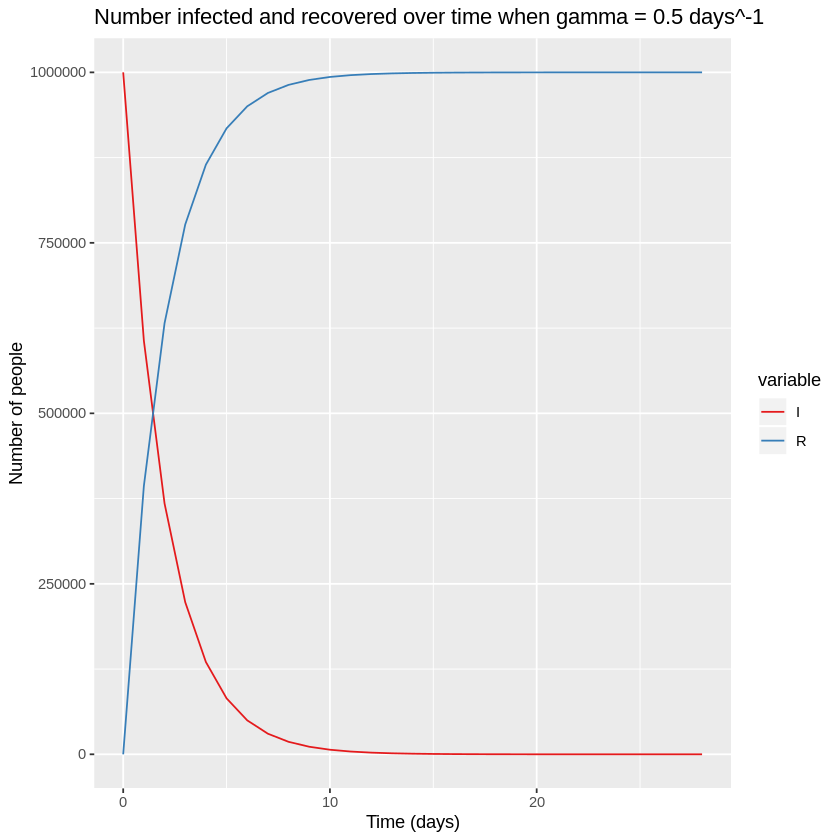

In [17]:
parameters <- c(gamma = 0.5)

# Solving the model
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = cohort_model,
                            parms = parameters))

# Plotting the output
output_long <- melt(as.data.frame(output), id = "time")   
# turn output dataset into long format

ggplot(data = output_long,       # specify object containing data to plot
       aes(x = time, 
           y = value, 
           colour = variable, 
           group = variable)) +  # assign columns to axes and groups
  geom_line() +                                 # represent data as lines
  xlab("Time (days)")+                          # add label for x axis
  ylab("Number of people") +                    # add label for y axis
  labs(title = paste("Number infected and recovered over time when gamma =",
                      parameters["gamma"],"days^-1")) + # add title
  scale_color_brewer(palette = "Set1")



Average duration of infection = 20 days so the recovery rate = 1/20 = 0.05 days$^{-1}$

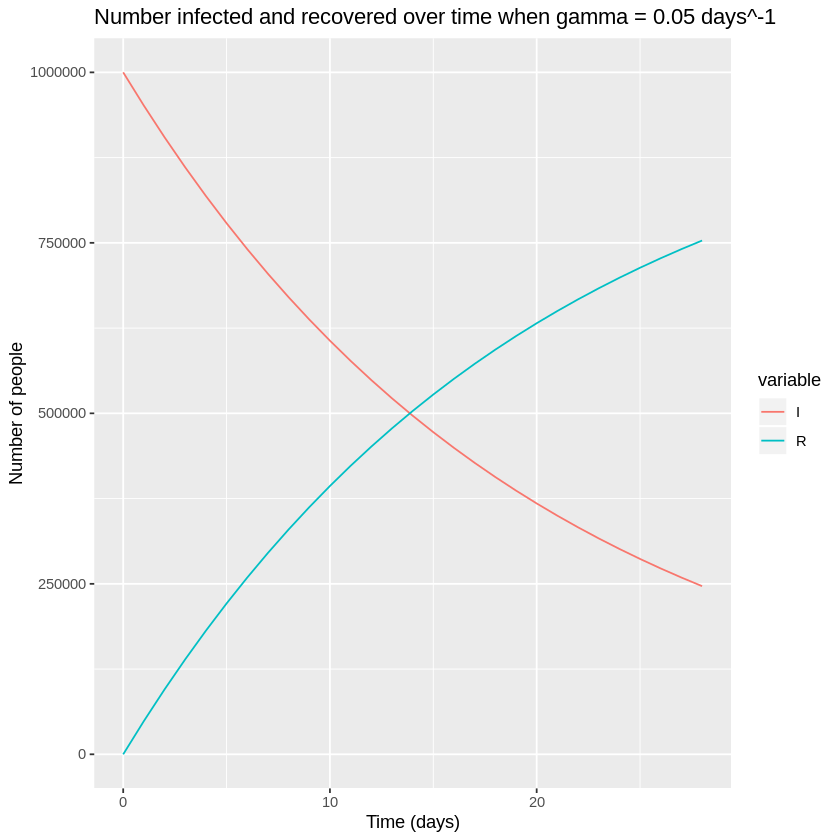

In [10]:
parameters <- c(gamma = 0.05)

# Solving the model
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = cohort_model,
                            parms = parameters))

# Plotting the output
output_long <- melt(as.data.frame(output), id = "time") 

ggplot(data = output_long,                                 
       aes(x = time, 
           y = value, 
           colour = variable, 
           group = variable)) +  # assign columns to axes and groups
  geom_line() +                  # represent data as lines
  xlab("Time (days)")+           # add label for x axis
  ylab("Number of people") +     # add label for y axis
  labs(title = paste("Number infected and recovered over time when gamma =",
                    parameters["gamma"],"days^-1")) # add title

### What changes do you observe in the transition to the recovered compartment if $\gamma$ is higher or lower? For example, how long does it take for everyone to recover in both cases?

Answer: if the rate is higher ($\gamma$ = 0.5), we can see that infected people recover more quickly: it takes less than 2 days for half of the infected cohort to recover, and by around 8 days, nearly everyone has recovered. A lower rate ($\gamma$ = 0.05) on the other hand corresponds to a slower transition: it takes around 14 days for half of infected people to move into the $R$ compartment, and by the end of our 4 week follow-up around a quarter of people still have not recovered.